## Parte 2 - Laboratorio 2 - Modelación y Simulación

Carol Arévalo, Stefano Aragoni, Luis Santos

------------

## Tasks 1

Suponga que la cantidad promedio de buses que llegan a una parada de bus dada es de 2 cada 30 minutos.
Considere X como la cantidad de buses que llegan a la mencionada parada de bus.


1. ¿Puede ser este evento modelado por una distribución de Poisson? ¿Por qué?

Sí, este evento puede ser modelado por una distribución de Poisson. La distribución de Poisson es adecuada para modelar eventos raros que ocurren de manera aleatoria e independiente en un intervalo de tiempo o espacio. 

Este evento cumple con la caracterisiticas de poisson: es un evento raro pues la llegada de buses a una parada de bus puede considerarse como un evento poco frecuente, es indpendiente pues la llegada de un bus no afecta las demás llegadas y tiene un número promedio conocido, pues el enunciado establece en promedio 2 buses llegan a la parada en un intervalo de 30 minutos. 


2. Calcule y grafique la probabilidad para diferentes números de buses, yendo desde 0 hasta 100. ¿Cuál es la
cantidad de buses más probable?

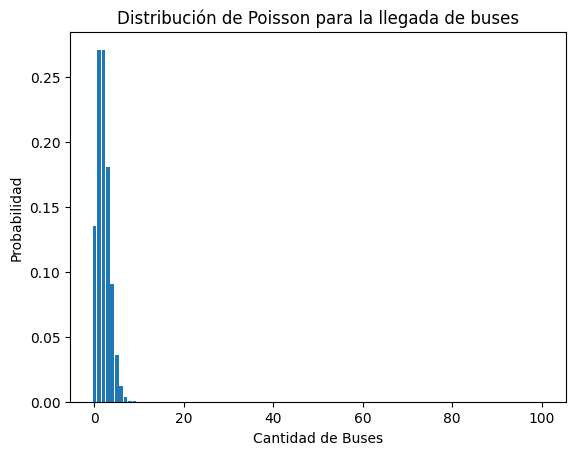

In [5]:
import math
import matplotlib.pyplot as plt

def poisson_probability(lambd, k):
    return (lambd ** k * math.exp(-lambd)) / math.factorial(k)

# Parámetro lambda (número promedio de buses que llegan en 30 minutos)
lambd = 2

# Números de buses para los que queremos calcular la probabilidad
num_buses = range(101)

# Calcular la probabilidad para cada número de buses
probabilities = [poisson_probability(lambd, k) for k in num_buses]

# Graficar la probabilidad para diferentes números de buses
plt.bar(num_buses, probabilities)
plt.xlabel('Cantidad de Buses')
plt.ylabel('Probabilidad')
plt.title('Distribución de Poisson para la llegada de buses')
plt.show()


--------
## Tasks 2

Asuma que usted trabaja en una industria relacionada con la veterinaria, con lo que sabe que una clínica
determinada el promedio de llegada de pacientes es de 5 por hora

1. Genere una tabla que muestre los tiempos intermedios en horas para los 10 primeros paciente

# PENDIENTE DE REVISAR

In [22]:
import numpy as np

def generar_tiempos_intermedios(promedio_llegadas, num_pacientes):
    tiempos_intermedios = np.random.exponential(scale=1/promedio_llegadas, size=num_pacientes)
    tiempos_acumulados = np.cumsum(tiempos_intermedios)
    tabla = [(i + 1, tiempos_intermedios[i], tiempos_acumulados[i]) for i in range(num_pacientes)]
    return tabla

promedio_llegadas = 5  # pacientes por hora
num_pacientes = 10

tabla_tiempos_intermedios = generar_tiempos_intermedios(promedio_llegadas, num_pacientes)

print("Tabla de tiempos intermedios para los primeros 10 pacientes:")
print("----------------------------------------------------------")
print("| Paciente | Tiempo Intermedio (horas) | Tiempo Acumulado (horas) |")
print("----------------------------------------------------------")
for paciente, tiempo_intermedio, tiempo_acumulado in tabla_tiempos_intermedios:
    print(f"| {paciente:<8} | {tiempo_intermedio:.4f}                | {tiempo_acumulado:.4f}                  |")
print("----------------------------------------------------------")


Tabla de tiempos intermedios para los primeros 10 pacientes:
----------------------------------------------------------
| Paciente | Tiempo Intermedio (horas) | Tiempo Acumulado (horas) |
----------------------------------------------------------
| 1        | 0.0374                | 0.0374                  |
| 2        | 0.3004                | 0.3378                  |
| 3        | 0.0537                | 0.3916                  |
| 4        | 0.0260                | 0.4176                  |
| 5        | 0.2232                | 0.6408                  |
| 6        | 0.4373                | 1.0782                  |
| 7        | 0.0608                | 1.1390                  |
| 8        | 0.1301                | 1.2691                  |
| 9        | 0.0274                | 1.2965                  |
| 10       | 0.4916                | 1.7881                  |
----------------------------------------------------------


2. Grafique usando el mismo lambda la CDF para la variable exponencial.

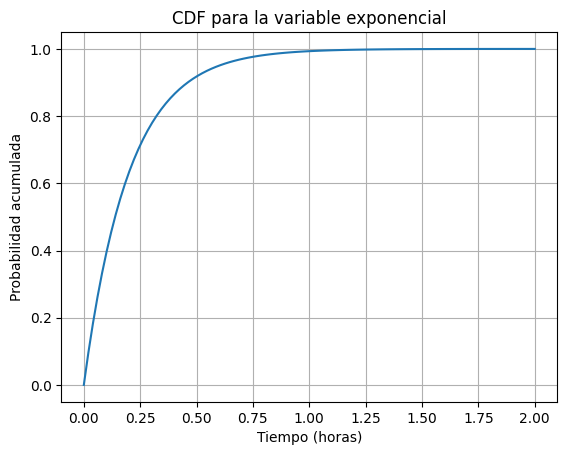

In [4]:
import numpy as np
import matplotlib.pyplot as plt

lambda_ = 5  # Tasa de llegada de pacientes por hora

# Valores para x (intervalo de tiempo en horas)
x = np.linspace(0, 2, 100)  # Intervalo de 0 a 2 horas

# Calcular la CDF para la variable exponencial con el mismo lambda
cdf = 1 - np.exp(-lambda_ * x)

# Graficar la CDF
plt.plot(x, cdf)
plt.xlabel('Tiempo (horas)')
plt.ylabel('Probabilidad acumulada')
plt.title('CDF para la variable exponencial')
plt.grid(True)
plt.show()


3. Haga una gráfica de los tiempos intermedios para los primeros 500 pacientes.

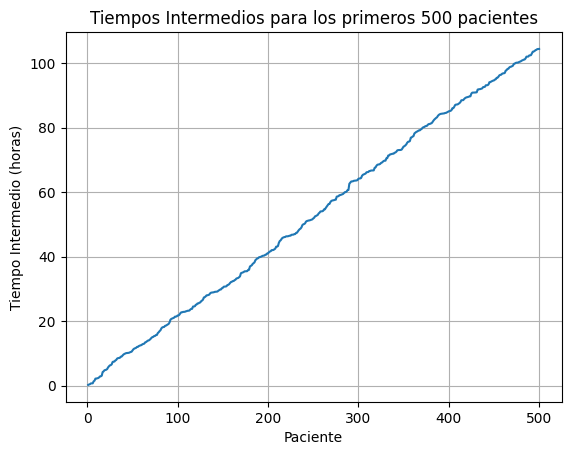

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generar_tiempos_intermedios(promedio_llegadas, num_pacientes):
    tiempos_intermedios = np.random.exponential(scale=1/promedio_llegadas, size=num_pacientes)
    tiempos_acumulados = np.cumsum(tiempos_intermedios)
    return tiempos_acumulados

promedio_llegadas = 5  # pacientes por hora
num_pacientes = 500

# Generar los tiempos intermedios para los 500 pacientes
tiempos_intermedios_500 = generar_tiempos_intermedios(promedio_llegadas, num_pacientes)

# Graficar los tiempos intermedios
plt.plot(range(1, num_pacientes + 1), tiempos_intermedios_500)
plt.xlabel('Paciente')
plt.ylabel('Tiempo Intermedio (horas)')
plt.title('Tiempos Intermedios para los primeros 500 pacientes')
plt.grid(True)
plt.show()


a. ¿Qué forma tiene la gráfica?
Como se puede observar en la imagen anterior, la gráfica toma una forma lineal. Tiene una forma ascendente y continua. Muestra cómo aumenta el tiempo intermedio (en horas) entre la llegada de cada paciente a medida que se atienden los primeros 500 pacientes en la clínica veterinaria.

b. ¿Cuál es la relación que se observa entre esta y la gráfica del punto anterior?

La CDF nos muestra la probabilidad acumulada de que el tiempo intermedio sea menor o igual a cierto valor, mientras que esta gráfica nos muestra los tiempos intermedios específicos para los primeros 500 pacientes generados a partir de la misma distribución exponencial. 

--------
## Tasks 3

Con la información que hemos recabado del ejercicio anterior, es fácil generar las llegadas de los pacientes a la
clínica veterinaria. Pues, si consideramos x1 = tiempo de llegada del primer paciente = tiempo intermedio para el
primer paciente, y x2 = tiempo de llegada del segundo paciente = x1 + tiempo intermedio para el segundo paciente
= x1 + x2, para x3 = tiempo de llegada del tercer paciente = x1 + x2 + tiempo intermedio para el tercer paciente = x1 + x2 + x3.


1. ¿Son las variables T1, T2 hasta Tk variables aleatorias? ¿Por qué?

Sí, las variables son variables aleatorias. Una variable aleatoria nos ayuda a definir eventos. Su valor está sujeto a la incertidumbre y se puede expresar mediante una distribución de probabilidad. En este caso, las variables  representan los tiempos de llegada de los pacientes a la clínica y su valor depende del tiempo intermedio entre llegadas de los pacientes. Además sigue una distribución exponencial de tasa lamda. 



2. Simule y grafique el proceso de Poisson completo usando el mismo gamma e información recabada del
ejercicio 2. Haga una simulación para 100 pacientes.

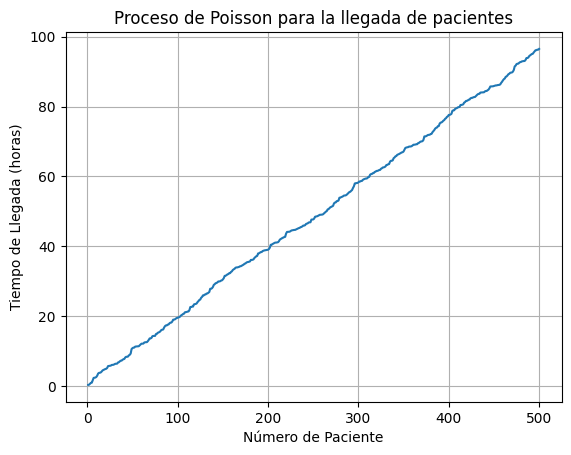

In [26]:
import numpy as np
import matplotlib.pyplot as plt

lambda_ = 5  # Tasa de llegada de pacientes por hora
num_pacientes = 500  # Número de pacientes

# Generar los tiempos intermedios para los primeros 500 pacientes
tiempos_intermedios = np.random.exponential(scale=1/lambda_, size=num_pacientes)

# Generar los tiempos de llegada de los pacientes
tiempos_llegada = np.cumsum(tiempos_intermedios)

# Graficar el proceso de Poisson completo
plt.plot(range(1, num_pacientes + 1), tiempos_llegada)
plt.xlabel('Número de Paciente')
plt.ylabel('Tiempo de Llegada (horas)')
plt.title('Proceso de Poisson para la llegada de pacientes')
plt.grid(True)
plt.show()
